# ChessVision Example

This notebook demonstrates the end-to-end process of detecting a chess position from an image using the ChessVision pipeline.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import cv2

from chessvision import ChessVision, constants, utils

In [3]:
# Read the test image
test_image_path = Path(constants.DATA_ROOT) / "test" / "raw" / "3cb7e9ca-0549-4072-a0ef-ae5ea82174e6.JPG"
img = cv2.imread(str(test_image_path))


## Process the Image with ChessVision Pipeline

In [4]:
cv_model = ChessVision()
result = cv_model.process_image(img)
print(result.position.fen)

3rrk2/2Pp1P1R/7P/2b2N2/p2pp3/7p/K1Q5/8


## Visualize the Detected Chess Position

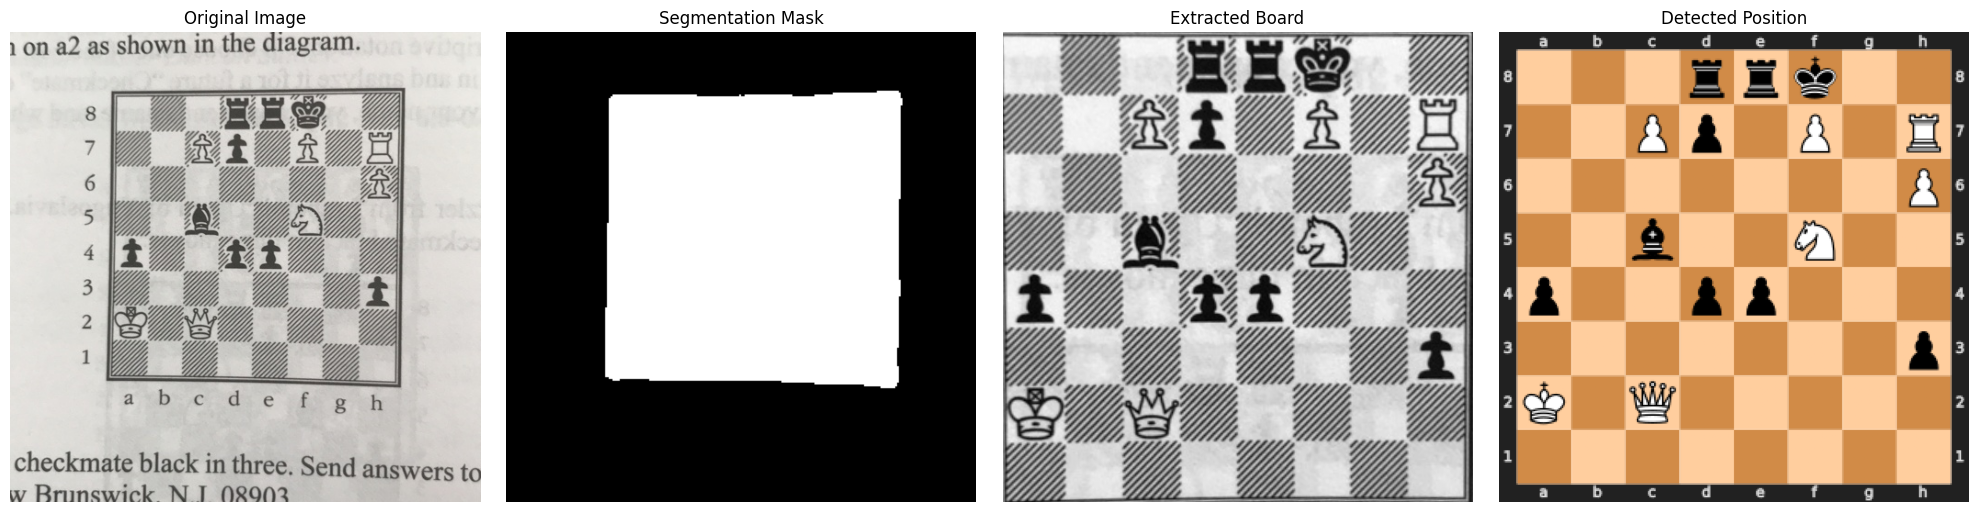

In [6]:
utils.display_comparison(
    img,
    result.board_extraction.binary_mask,
    result.board_extraction.board_image,
    result.position.fen,
)